In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/workspace/code/bait_news_gen/data/Fake/content_rotation_forward/filtered/fake_top1_90_99.csv')
len(df)

118611

In [3]:
df.head(1)

,news_id,original_title,original_content,sim_news_id,fake_title,category,label,sim_news_content,sim_news_title,filter_bertscore
0,PO_M03_417681,정경두 “SLBM 도발은 남북군사합의에 없다”,정경두 국방부 장관은 2일 국회 국방위원회 국정감사에서 북한의 이날 미사일 발사가 ...,PO_M03_115891,"정경두 \""北 미사일 발사, '비밀적 도발' 오해\""",PO,0,북한이 순항미사일을 발사한 지 3일 만인 15일 단거리 탄도미사일 2발을 동해상으로...,"한국 첫 SLBM 쏜날, 북 탄도미사일 도발",0.945965


In [4]:
# 가설 : 가짜 제목이면 본문에 없는 단어가 포함될 것이다.
from konlpy.tag import Mecab
from tqdm import tqdm
import re
 
def clean_text(text):
  text_removed = re.sub('[-=+,#/\?:^.@*\"※~ㆍ!』‘|\(\)\[\]`\'…》\”\“\’·]', ' ', text)
  return text_removed

mecab = Mecab()
titles = df['fake_title'].tolist()
contents = df['original_content'].tolist()

title_n_list = []
content_n_list = []
for idx in tqdm(range(len(titles)), desc=f'Extract Morphs', total=len(titles), leave=False):
    title_cleaned = clean_text(titles[idx])
    content_cleaned = clean_text(contents[idx])
    title_n_list.append([m for m in mecab.morphs(title_cleaned) if len(m) > 1])
    content_n_list.append([m for m in mecab.morphs(content_cleaned) if len(m) > 1])

In [5]:
fake = []
tokens_for_fakenews = []
for title, content in zip(title_n_list, content_n_list):
    fake_token = ''
    f = 0 #flag for no false negative
    for token in title:
        # 가설 : 가짜 제목이면 본문에 없는 단어가 포함될 것이다.
        content_joined = ' '.join(content)
        if content_joined.count(token) == 0:
            f = 1
            fake_token += token + ' '
    if f == 1:
        fake.append(1)
    else:
        fake.append(0)
    tokens_for_fakenews.append(fake_token)
df['fake'] = fake
df['tokens_for_fake'] = tokens_for_fakenews

In [6]:
len(df[df['fake']==1])

86644

In [13]:
df[df['fake']==0].head(5)

,news_id,original_title,original_content,sim_news_id,fake_title,category,label,sim_news_content,sim_news_title,filter_bertscore,fake,tokens_for_fake
2,EC_M05_227267,"대한항공-현대오일뱅크, 바이오항공유 협력 MOU",대한항공이 항공 부문 기후변화에 대응하기 위해 현대오일뱅크와 협력한다.\n대한항공과...,EC_M05_232562,"대한항공, '바이오항공유' 도입 협력",EC,0,대한항공은 ESG(환경·사회·지배구조) 경영 일환으로 SK에너지와 탄소중립항공유 도...,"대한항공, SK에너지와 '탄소중립항공유' 도입 협력",0.948480,0,
7,GB_M11_286727,미국 경제 3분의 1 멈춘다…외출금지령 5개주로 늘어,신종 코로나바이러스 감염증(코로나19) 확산으로 미국 경제 3분의 1이 멈추게 됐다...,GB_M08_299035,"美 경제 3분 1 끝...\""외출 제한\""",GB,0,"#1. \""외출은 안 됩니다. 어디 갑니까?\"" 지난달 17일 새벽, 신종 코로나바...",술 마시고 폭행하고…日코로나 확진자 무단 외출에 골머리,0.922919,0,
10,LC_M03_094705,[더오래]'젖은 손이 애처로워~' 이제야 그걸 깨닫다니,"━ [더,오래] 강인춘의 80돌 아이(27) 작가노트 “엊저녁 식탁에서 우연히 본 ...",LC_M03_094873,[더오래] 대 대 짓거리,LC,0,"━ [더,오래] 강인춘의 80돌 아이(14) 작가노트 “인마! 너 마누라 손안에 잡...","마누라에 잡혀사냐고? 천만에 말씀, 사실은…",0.927831,0,
13,PO_M08_103716,"北, 김정은 사회로 당 전원 회의 돌입…코로나·경제 논의 예상",북한이 이달 상순 개최를 예고한 노동당 중앙위원회 제8기 제5차 전원회의가 8일 시...,PO_M03_113470,"北, 제8기 제5차 전원회의 확대회의 개최",PO,0,북한 노동당 중앙위원회 제8기 제5차 전원회의 확대회의가 8일 소집됐다고 조선중앙통...,"[속보]北, 노동당 5차 전원회의 확대회의 어제 소집…김정은 참석",0.926741,0,
14,LC_M09_365485,영국 두번째 여왕 퀸①-프레디 머큐리의 쇼는 계속된다,[이재익의 아재음악 열전] 드디어 올 것이 왔다.\n가장 맛있는 사탕을 아껴 먹는 ...,LC_M09_366190,[이재익의 아재음악 열전] 이재익의 아재음악 열전,LC,0,"[이재익의 아재음악 열전] 지난여름이었다.\n퀸과 의 광풍이 불기 전, 아니 미풍도...",20대에 음악으로 세계를 정복한 ‘로켓맨’-엘턴 존①,0.919055,0,


In [20]:
real_df = pd.read_csv('/workspace/code/bait_news_gen/data/Real/test.csv')
fake_df = pd.read_csv('/workspace/code/bait_news_gen/data/Fake/content_rotation_forward/filtered/test.csv')

In [29]:
from KoBERTScore.KoBERTScore import BERTScore
import kss

# 제목과 본문내 각 문장 사이의 BERTScore를 구함
def get_max_score(df, real=True):
    max_score = []
    for idx in range(len(df)):
        content_sentences = kss.split_sentences(df.loc[idx, 'original_content'])
        if real == True:
            title_duplicated = [df.loc[idx, 'original_title']] * len(content_sentences)
        else:
            title_duplicated = [df.loc[idx, 'fake_title']] * len(content_sentences)
        bert_scorer = BERTScore(model_name_or_path = 'klue/roberta-large')
        score = bert_scorer.score(title_duplicated, content_sentences)
        max_score.append(max(score))
    df['max_score'] = max_score
    return df

In [30]:
real_df = get_max_score(real_df)
fake_df = get_max_score(fake_df, real=False)

Calculate BERTScore:   0%|          | 0/13000 [00:00<?, ?it/s]You are using a model of type roberta to instantiate a model of type bert. This is not supported for all configurations of models and can yield errors.
Some weights of the model checkpoint at klue/roberta-large were not used when initializing BertModel: ['roberta.encoder.layer.12.attention.output.dense.bias', 'roberta.encoder.layer.17.output.LayerNorm.weight', 'roberta.encoder.layer.0.attention.self.value.bias', 'roberta.encoder.layer.5.attention.output.LayerNorm.weight', 'roberta.encoder.layer.19.intermediate.dense.bias', 'roberta.encoder.layer.11.attention.output.dense.bias', 'roberta.encoder.layer.13.attention.self.value.bias', 'roberta.encoder.layer.17.attention.output.dense.weight', 'roberta.encoder.layer.21.intermediate.dense.weight', 'roberta.encoder.layer.3.output.LayerNorm.weight', 'roberta.encoder.layer.4.attention.self.value.bias', 'roberta.encoder.layer.13.attention.output.LayerNorm.weight', 'roberta.encoder.laye

Load klue/roberta-large with 22 layers


Calculating BERTScore:   0%|          | 0/1 [00:00<?, ?it/s]

Train IDF: 0it [00:00, ?it/s]

/workspace/code/bait_news_gen/filtering/KoBERTScore/KoBERTScore/score.py:418: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  ../torch/csrc/utils/tensor_new.cpp:201.)
  idf = torch.tensor([idf_array]).T
Calculate BERTScore:   0%|          | 1/13000 [00:15<56:52:59, 15.75s/it]You are using a model of type roberta to instantiate a model of type bert. This is not supported for all configurations of models and can yield errors.
Some weights of the model checkpoint at klue/roberta-large were not used when initializing BertModel: ['roberta.encoder.layer.12.attention.output.dense.bias', 'roberta.encoder.layer.17.output.LayerNorm.weight', 'roberta.encoder.layer.0.attention.self.value.bias', 'roberta.encoder.layer.5.attention.output.LayerNorm.weight', 'roberta.encoder.layer.19.intermediate.dense.bias', 'roberta.encoder.layer.11

Load klue/roberta-large with 22 layers


Calculating BERTScore:   0%|          | 0/1 [00:00<?, ?it/s]

Train IDF: 0it [00:00, ?it/s]

Calculate BERTScore:   0%|          | 2/13000 [00:26<45:56:16, 12.72s/it]You are using a model of type roberta to instantiate a model of type bert. This is not supported for all configurations of models and can yield errors.
Some weights of the model checkpoint at klue/roberta-large were not used when initializing BertModel: ['roberta.encoder.layer.12.attention.output.dense.bias', 'roberta.encoder.layer.17.output.LayerNorm.weight', 'roberta.encoder.layer.0.attention.self.value.bias', 'roberta.encoder.layer.5.attention.output.LayerNorm.weight', 'roberta.encoder.layer.19.intermediate.dense.bias', 'roberta.encoder.layer.11.attention.output.dense.bias', 'roberta.encoder.layer.13.attention.self.value.bias', 'roberta.encoder.layer.17.attention.output.dense.weight', 'roberta.encoder.layer.21.intermediate.dense.weight', 'roberta.encoder.layer.3.output.LayerNorm.weight', 'roberta.encoder.layer.4.attention.self.value.bias', 'roberta.encoder.layer.13.attention.output.LayerNorm.weight', 'roberta.e

Load klue/roberta-large with 22 layers


Calculating BERTScore:   0%|          | 0/1 [00:00<?, ?it/s]

Train IDF: 0it [00:00, ?it/s]

Calculate BERTScore:   0%|          | 3/13000 [00:34<38:55:42, 10.78s/it]You are using a model of type roberta to instantiate a model of type bert. This is not supported for all configurations of models and can yield errors.
Some weights of the model checkpoint at klue/roberta-large were not used when initializing BertModel: ['roberta.encoder.layer.12.attention.output.dense.bias', 'roberta.encoder.layer.17.output.LayerNorm.weight', 'roberta.encoder.layer.0.attention.self.value.bias', 'roberta.encoder.layer.5.attention.output.LayerNorm.weight', 'roberta.encoder.layer.19.intermediate.dense.bias', 'roberta.encoder.layer.11.attention.output.dense.bias', 'roberta.encoder.layer.13.attention.self.value.bias', 'roberta.encoder.layer.17.attention.output.dense.weight', 'roberta.encoder.layer.21.intermediate.dense.weight', 'roberta.encoder.layer.3.output.LayerNorm.weight', 'roberta.encoder.layer.4.attention.self.value.bias', 'roberta.encoder.layer.13.attention.output.LayerNorm.weight', 'roberta.e

Load klue/roberta-large with 22 layers


Calculating BERTScore:   0%|          | 0/1 [00:00<?, ?it/s]

Train IDF: 0it [00:00, ?it/s]

Calculate BERTScore:   0%|          | 4/13000 [00:43<35:25:13,  9.81s/it]You are using a model of type roberta to instantiate a model of type bert. This is not supported for all configurations of models and can yield errors.
Some weights of the model checkpoint at klue/roberta-large were not used when initializing BertModel: ['roberta.encoder.layer.12.attention.output.dense.bias', 'roberta.encoder.layer.17.output.LayerNorm.weight', 'roberta.encoder.layer.0.attention.self.value.bias', 'roberta.encoder.layer.5.attention.output.LayerNorm.weight', 'roberta.encoder.layer.19.intermediate.dense.bias', 'roberta.encoder.layer.11.attention.output.dense.bias', 'roberta.encoder.layer.13.attention.self.value.bias', 'roberta.encoder.layer.17.attention.output.dense.weight', 'roberta.encoder.layer.21.intermediate.dense.weight', 'roberta.encoder.layer.3.output.LayerNorm.weight', 'roberta.encoder.layer.4.attention.self.value.bias', 'roberta.encoder.layer.13.attention.output.LayerNorm.weight', 'roberta.e

Load klue/roberta-large with 22 layers


Calculating BERTScore:   0%|          | 0/1 [00:00<?, ?it/s]

Train IDF: 0it [00:00, ?it/s]

Calculate BERTScore:   0%|          | 5/13000 [00:50<32:40:28,  9.05s/it]You are using a model of type roberta to instantiate a model of type bert. This is not supported for all configurations of models and can yield errors.
Some weights of the model checkpoint at klue/roberta-large were not used when initializing BertModel: ['roberta.encoder.layer.12.attention.output.dense.bias', 'roberta.encoder.layer.17.output.LayerNorm.weight', 'roberta.encoder.layer.0.attention.self.value.bias', 'roberta.encoder.layer.5.attention.output.LayerNorm.weight', 'roberta.encoder.layer.19.intermediate.dense.bias', 'roberta.encoder.layer.11.attention.output.dense.bias', 'roberta.encoder.layer.13.attention.self.value.bias', 'roberta.encoder.layer.17.attention.output.dense.weight', 'roberta.encoder.layer.21.intermediate.dense.weight', 'roberta.encoder.layer.3.output.LayerNorm.weight', 'roberta.encoder.layer.4.attention.self.value.bias', 'roberta.encoder.layer.13.attention.output.LayerNorm.weight', 'roberta.e

Load klue/roberta-large with 22 layers


Calculating BERTScore:   0%|          | 0/1 [00:00<?, ?it/s]

Train IDF: 0it [00:00, ?it/s]

Calculate BERTScore:   0%|          | 6/13000 [00:59<31:46:12,  8.80s/it]You are using a model of type roberta to instantiate a model of type bert. This is not supported for all configurations of models and can yield errors.
Some weights of the model checkpoint at klue/roberta-large were not used when initializing BertModel: ['roberta.encoder.layer.12.attention.output.dense.bias', 'roberta.encoder.layer.17.output.LayerNorm.weight', 'roberta.encoder.layer.0.attention.self.value.bias', 'roberta.encoder.layer.5.attention.output.LayerNorm.weight', 'roberta.encoder.layer.19.intermediate.dense.bias', 'roberta.encoder.layer.11.attention.output.dense.bias', 'roberta.encoder.layer.13.attention.self.value.bias', 'roberta.encoder.layer.17.attention.output.dense.weight', 'roberta.encoder.layer.21.intermediate.dense.weight', 'roberta.encoder.layer.3.output.LayerNorm.weight', 'roberta.encoder.layer.4.attention.self.value.bias', 'roberta.encoder.layer.13.attention.output.LayerNorm.weight', 'roberta.e

Load klue/roberta-large with 22 layers


Calculating BERTScore:   0%|          | 0/1 [00:00<?, ?it/s]

Train IDF: 0it [00:00, ?it/s]

Calculate BERTScore:   0%|          | 7/13000 [01:06<29:59:10,  8.31s/it]You are using a model of type roberta to instantiate a model of type bert. This is not supported for all configurations of models and can yield errors.


KeyboardInterrupt: 

In [ ]:
real_df

In [53]:
df['BERTScore'].describe()

count    131999.000000
mean          0.928526
std           0.015578
min           0.816958
25%           0.919810
50%           0.929679
75%           0.938405
max           0.999384
Name: BERTScore, dtype: float64

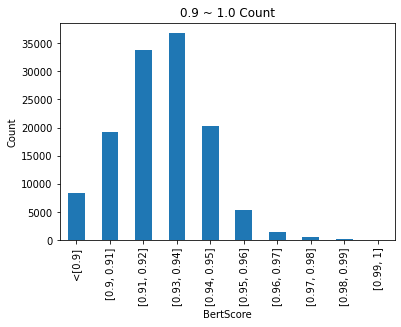

In [54]:
# 구간별 count 계산
bins = [0.9, 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 1.0]
labels = ['<[0.9]','[0.9, 0.91]', '[0.91, 0.92]', '[0.93, 0.94]', '[0.94, 0.95]','[0.95, 0.96]', '[0.96, 0.97]', '[0.97, 0.98]', '[0.98, 0.99]', '[0.99, 1]']
df['bin'] = pd.cut(df['BERTScore'], bins=bins, labels=labels, right=False, include_lowest=True)
counts = df['bin'].value_counts().sort_index()

# barplot 생성
counts.plot(kind='bar')
plt.xlabel('BertScore')
plt.ylabel('Count')
plt.title('0.9 ~ 1.0 Count')
plt.show()

In [55]:
counts

<[0.9]           8454
[0.9, 0.91]     19164
[0.91, 0.92]    33781
[0.93, 0.94]    36798
[0.94, 0.95]    20221
[0.95, 0.96]     5408
[0.96, 0.97]     1505
[0.97, 0.98]      530
[0.98, 0.99]      199
[0.99, 1]          60
Name: bin, dtype: int64

In [57]:
df['category'].unique()

array(['PO', 'IS', 'EC', 'SO', 'LC', 'GB', 'ET'], dtype=object)

In [61]:
df[df['bin']=='[0.98, 0.99]'].value_counts()

ET    148
LC     25
EC     15
IS      6
SO      3
GB      2
Name: category, dtype: int64

In [64]:
index = (df['category'] =='ET') & (df['bin']=='[0.98, 0.99]')
df[index].head()

,news_id,original_title,content,sim_news_id,bait_title,category,label,bait_content,BERTScore,bin
1806,ET_M03_037031,"SMAP 해체설… \""기무라 타쿠야만 남고 초난강 외 3명 소속사 떠나\""",SMAP 해체설 기무라 타쿠야 초난강 일본의 인기 그룹 ‘스맙(SMAP)’의 해체설...,ET_M03_037029,"SMAP 해체설…\""기무라 타쿠야만 남고 초난강 외 3명은 소속사 떠나\""",ET,0,SMAP 해체설 기무라 타쿠야 초난강 일본의 인기 그룹 ‘스맙(SMAP)’의 해체설...,0.987631,"[0.98, 0.99]"
3372,ET_M03_281300,"'부탁해요 엄마' 민아, 최태준의 결혼 여부 알아챘다 … 운명의 장난?",'부탁해요 엄마' 민아 '부탁해요 엄마'에서 민아가 최태준이 결혼한 사실을 알았다....,ET_M03_281317,"'부탁해요 엄마' 민아, 최태준의 결혼 사실 알아버려 … 운명의 장난",ET,0,'부탁해요 엄마' 민아 '부탁해요 엄마'에서 민아가 최태준이 결혼한 사실을 알았다....,0.981007,"[0.98, 0.99]"
4515,ET_M03_279210,"\""라디오스타\"" 박소담, '사도' 촬영 중 실제로 맞아 멍들어",박소담 라디오스타 배우 박소담이 MBC '라디오스타'에 출연하여 화제가 되고 있다....,ET_M03_279180,"\""라디오스타\"" 박소담, '사도' 촬영 중에 실제로 맞아 멍든 경험",ET,0,박소담 라디오스타 배우 박소담이 MBC '라디오스타'에 출연하여 화제가 되고 있다....,0.983672,"[0.98, 0.99]"
5240,ET_M03_280208,"'마리와 나' 강호동 서인국, 도도한 고양이에 \""우울증 걸릴것 같다\""","사진 JTBC 강호동 서인국, '마리와 나' 도도한 고양이에 \""우울증 걸릴것 같다...",ET_M03_280187,"강호동 서인국, '마리와 나' 도도한 고양이에 \""우울증 걸릴것 같다\""",ET,0,"사진 JTBC 강호동 서인국, '마리와 나' 도도한 고양이에 \""우울증 걸릴것 같다...",0.987734,"[0.98, 0.99]"
5862,ET_M03_279457,"김광진 의원실 \""'응답하라 1988' 류준열 결혼식 올리는 중\""…스포 공개 '헉'",더불어민주당 소속 김광진 의원실이 ‘응답하라 1988’의 핵심 ‘남편 찾기’와 관련...,ET_M03_279540,"김광진 의원실 \""'응답하라 1988' 류준열 결혼식 올리는 중\""…스포 논란",ET,0,더불어민주당 소속 김광진 의원실이 ‘응답하라 1988’의 핵심 ‘남편 찾기’와 관련...,0.988083,"[0.98, 0.99]"


In [66]:
df[df['bin']=='[0.98, 0.99]'][['original_title','bait_title','BERTScore']].head() #[['original_title','bait_title','BERTScore']]

,original_title,bait_title,BERTScore
1806,"SMAP 해체설… \""기무라 타쿠야만 남고 초난강 외 3명 소속사 떠나\""","SMAP 해체설…\""기무라 타쿠야만 남고 초난강 외 3명은 소속사 떠나\""",0.987631
3372,"'부탁해요 엄마' 민아, 최태준의 결혼 여부 알아챘다 … 운명의 장난?","'부탁해요 엄마' 민아, 최태준의 결혼 사실 알아버려 … 운명의 장난",0.981007
4515,"\""라디오스타\"" 박소담, '사도' 촬영 중 실제로 맞아 멍들어","\""라디오스타\"" 박소담, '사도' 촬영 중에 실제로 맞아 멍든 경험",0.983672
5240,"'마리와 나' 강호동 서인국, 도도한 고양이에 \""우울증 걸릴것 같다\""","강호동 서인국, '마리와 나' 도도한 고양이에 \""우울증 걸릴것 같다\""",0.987734
5862,"김광진 의원실 \""'응답하라 1988' 류준열 결혼식 올리는 중\""…스포 공개 '헉'","김광진 의원실 \""'응답하라 1988' 류준열 결혼식 올리는 중\""…스포 논란",0.988083
